# This is my MLDV project, i will be doing clasification and it will be predicting the category that customers bought from, I have included the original data csv files in the folder and got it from: https://www.kaggle.com/datasets/dataceo/sales-and-customer-data/data

# Importing the necessary libaries
### pandas (To present the data in a structured manner)
### numpy (To perform the necessary mathamatical and numerical operations)
### matplotlib ( To visualise the data as charts )

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
customer_data=pd.read_csv("customer_data.csv")
sales_data = pd.read_csv("sales_data.csv")

## Exploratory Data Analysis

In [3]:
customer_data.head()

,customer_id,gender,age,payment_method
0,C241288,Female,28.0,Credit Card
1,C111565,Male,21.0,Debit Card
2,C266599,Male,20.0,Cash
3,C988172,Female,66.0,Credit Card
4,C189076,Female,53.0,Cash


In [4]:
sales_data.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall
0,I138884,C241288,Clothing,5,1500.40,05-08-2022,Kanyon
1,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul
2,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity
3,I173702,C988172,Shoes,5,3000.85,16-05-2021,Metropol AVM
4,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon


In [5]:
customer_data.shape


(99457, 4)

In [6]:
sales_data.shape

(99457, 7)

#### This is to make sure that there is no missing rows when merging

In [7]:
merged_data = pd.merge(customer_data,sales_data , on='customer_id') #merged the 2 data sets

In [8]:
merged_data.head()

,customer_id,gender,age,payment_method,invoice_no,category,quantity,price,invoice_date,shopping_mall
0,C241288,Female,28.0,Credit Card,I138884,Clothing,5,1500.40,05-08-2022,Kanyon
1,C111565,Male,21.0,Debit Card,I317333,Shoes,3,1800.51,12-12-2021,Forum Istanbul
2,C266599,Male,20.0,Cash,I127801,Clothing,1,300.08,09-11-2021,Metrocity
3,C988172,Female,66.0,Credit Card,I173702,Shoes,5,3000.85,16-05-2021,Metropol AVM
4,C189076,Female,53.0,Cash,I337046,Books,4,60.60,24-10-2021,Kanyon


In [9]:
merged_data.shape # to check if there is any missing number of rows

(99457, 10)

In [10]:
list(merged_data.columns)

['customer_id',
 'gender',
 'age',
 'payment_method',
 'invoice_no',
 'category',
 'quantity',
 'price',
 'invoice_date',
 'shopping_mall']

In [11]:

print(merged_data.dtypes)

customer_id        object
gender             object
age               float64
payment_method     object
invoice_no         object
category           object
quantity            int64
price             float64
invoice_date       object
shopping_mall      object
dtype: object


In [12]:
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99457 non-null  object 
 4   invoice_no      99457 non-null  object 
 5   category        99457 non-null  object 
 6   quantity        99457 non-null  int64  
 7   price           99457 non-null  float64
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.6+ MB
None


In [13]:
merged_data.nunique()

customer_id       99457
gender                2
age                  52
payment_method        3
invoice_no        99457
category              8
quantity              5
price                40
invoice_date        797
shopping_mall        10
dtype: int64

### Summary #1, what have i learnt so far:
#### - total number of rows is 99457
#### - total number of columns is 10
#### - age is the only coumn with missing values
#### - customer_id and invoice_no are identifier columns

In [14]:
merged_data_shopping_mall = merged_data.groupby('shopping_mall').size()
merged_data_shopping_mall

shopping_mall
Cevahir AVM           4991
Emaar Square Mall     4811
Forum Istanbul        4947
Istinye Park          9781
Kanyon               19823
Mall of Istanbul     19943
Metrocity            15011
Metropol AVM         10161
Viaport Outlet        4914
Zorlu Center          5075
dtype: int64

In [15]:
merged_data_price = merged_data.groupby('price').size()
merged_data_price

price
5.23       3002
10.46      2909
11.73      1024
15.15       985
15.69      2992
20.92      2884
23.46       984
26.15      2989
30.30      1008
35.19      1077
35.84      2000
40.66      2986
45.45      1000
46.92       922
58.65       992
60.60       959
71.68      1958
75.75      1029
81.32      2974
107.52     2082
121.98     3072
143.36     2076
162.64     3010
179.20     1971
203.30     3055
300.08     6841
600.16     6950
600.17     1944
900.24     6907
1050.00     985
1200.32    6849
1200.34    2045
1500.40    6940
1800.51    2010
2100.00    1000
2400.68    2022
3000.85    2013
3150.00    1009
4200.00    1001
5250.00    1001
dtype: int64

In [16]:
merged_data_price = {
    'price': [5.23, 10.46, 11.73, 15.15, 15.69, 20.92, 23.46, 26.15, 30.30, 35.19, 
              35.84, 40.66, 45.45, 46.92, 58.65, 60.60, 71.68, 75.75, 81.32, 107.52,
              121.98, 143.36, 162.64, 179.20, 203.30, 300.08, 600.16, 600.17, 900.24,
              1050.00, 1200.32, 1200.34, 1500.40, 1800.51, 2100.00, 2400.68, 3000.85,
              3150.00, 4200.00, 5250.00],
    'count': [3002, 2909, 1024, 985, 2992, 2884, 984, 2989, 1008, 1077,
              2000, 2986, 1000, 922, 992, 959, 1958, 1029, 2974, 2082,
              3072, 2076, 3010, 1971, 3055, 6841, 6950, 1944, 6907, 985,
              6849, 2045, 6940, 2010, 1000, 2022, 2013, 1009, 1001, 1001]
}

In [17]:
merged_data_price = pd.DataFrame(merged_data_price)
merged_data_price

,price,count
0,5.23,3002
1,10.46,2909
2,11.73,1024
3,15.15,985
4,15.69,2992
5,20.92,2884
6,23.46,984
7,26.15,2989
8,30.30,1008
9,35.19,1077


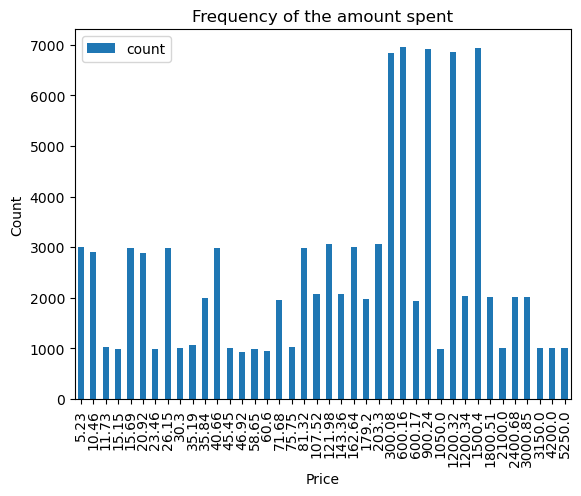

In [18]:
merged_data_price.plot(x='price', y='count', kind='bar')

plt.title('Frequency of the amount spent')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


### From this graph, i can tell that the data for price is right skewed, cleaning to make it even may be needed, but as i am predicting the category that customers bought from, i may not want to make much changes to this column as price is an important aspect based on domain knowledge

In [19]:
merged_data_age = merged_data.groupby('age').size

In [20]:
merged_data_age = {
    'age': [18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0,
            28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0,
            38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0,
            48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0,
            58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0,
            68.0, 69.0],
    'count': [1843, 1930, 1844, 1945, 2050, 1895, 1977, 1859, 1894, 1948,
              1951, 1881, 1978, 1862, 1891, 1908, 1881, 1840, 1952, 2056,
              1953, 1946, 1956, 1886, 1890, 1999, 1901, 1875, 1910, 1877,
              1953, 1882, 1871, 1989, 1943, 1902, 1829, 1842, 1914, 1877,
              1871, 1869, 1871, 1941, 1909, 1885, 2002, 1854, 1875, 1899,
              1885, 1897]
}

In [21]:
merged_data_age = pd.DataFrame(merged_data_age)


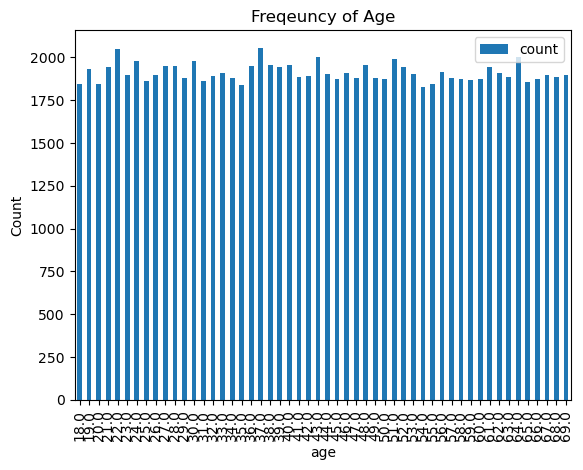

In [22]:
merged_data_age.plot(x='age', y='count', kind='bar')

plt.title('Freqeuncy of Age')
plt.xlabel('age')
plt.ylabel('Count')
plt.show()

### From this graph, i can tell that the age is evenly distributed, only cleaning needed is to replace the missing values

In [23]:
merged_data_quantity = merged_data.groupby('quantity').size()
merged_data_quantity  # checking for invalid or negative value data

quantity
1    19767
2    19828
3    20149
4    19723
5    19990
dtype: int64

In [24]:
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'yellow']

In [25]:
merged_data_payment_method = merged_data.groupby('payment_method').size()
merged_data_payment_method

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
dtype: int64

In [26]:
payment_method = ['Cash','Credit Card','Debit Card']
payment_method_count =[ 44447, 34931, 20079]

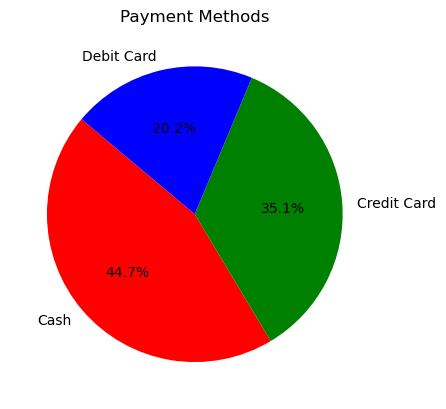

In [27]:
plt.pie(payment_method_count, labels=payment_method, colors=colors,  autopct='%1.1f%%',  startangle=140)
plt.title('Payment Methods')
plt.show()

#### from this pie chart, the majority of transaction are through cash and the distribution of data would still be acceptable

In [28]:
merged_data_gender = merged_data.groupby('gender').size()
merged_data_gender

gender
Female    59482
Male      39975
dtype: int64

In [29]:
gender = ['Male', 'Female']
gender_counts = [59482, 39975]

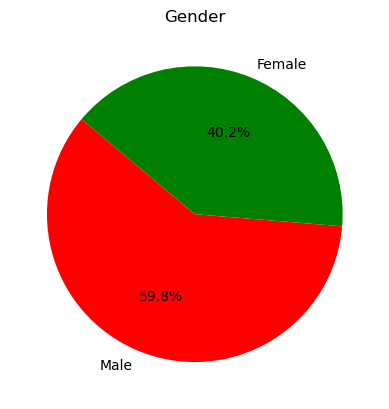

In [30]:
plt.pie(gender_counts, labels=gender, colors=colors,  autopct='%1.1f%%',  startangle=140)
plt.title('Gender')
plt.show()

#### from this pie chart, the distribution of data for gender is acceptable, the chances for machine bias will be low 

In [31]:
merged_data_category = merged_data.groupby('category').size()
merged_data_category


category
Books               4981
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Shoes              10034
Souvenir            4999
Technology          4996
Toys               10087
dtype: int64

In [32]:

categories = ["Books", "Clothing", "Cosmetics", "Food & Beverage", "Shoes", "Souvenir", "Technology", "Toys"]
category_counts = [4981, 34487, 15097, 14776, 10034, 4999, 4996, 10087]



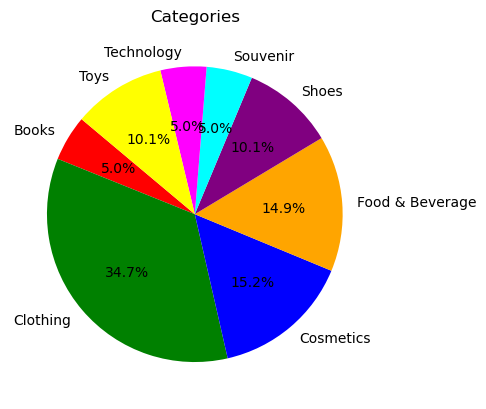

In [33]:
plt.pie(category_counts, labels=categories, colors=colors,  autopct='%1.1f%%',  startangle=140)
plt.title('Categories')
plt.show()

#### from this pie chart, i can tell that the majority of category is on clothing

## summary of exploratory data analysis
#### There is a total of 99457 rows and 10 columns
#### The customer_id and invoice_no are identifier columns are they have 99457 unique values
#### The gender columns contains two values, male and female and the distribuition is quite even at 59.8% males and 40.2% females
#### The age columns contains 51 unique values and the spread of data is evenly distributed, with some missing values
#### The payment_method column is the type of payment used to complete the transactions and the distribution is not very even but still acceptable
#### Category column is the type of category that the item that the customer purchased from, majority of the data is from clothing
#### The quantity column is how much items the customer bought, the data is evenly distributed
#### The price column is how mcuh the customer spends, the data distribution for price is right skewed
#### The invoice_date column is when the customer bought the items
#### the shopping_mall column is where the customer bought yhe items from

# Data cleaning and feature engineering


# Before doing any cleaning, i will take out a few rows of columns and store it in a csv file in order to test my algorithm in the later stages

In [34]:
testing_data = merged_data.sample(n=20, random_state=21)
testing_data.to_csv('testing_data', index=False)

In [35]:
merged_data = merged_data.drop(testing_data.index) # droppping the rows i removed to prevent data leakage

In [36]:
print(merged_data.info()) # you can see that the total number of rows dropped to 99437 from 99457

<class 'pandas.core.frame.DataFrame'>
Index: 99437 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99437 non-null  object 
 1   gender          99437 non-null  object 
 2   age             99318 non-null  float64
 3   payment_method  99437 non-null  object 
 4   invoice_no      99437 non-null  object 
 5   category        99437 non-null  object 
 6   quantity        99437 non-null  int64  
 7   price           99437 non-null  float64
 8   invoice_date    99437 non-null  object 
 9   shopping_mall   99437 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 8.3+ MB
None


## First i will replace the missing values in the age column with the mean age

In [37]:
merged_data['age'] = merged_data['age'].fillna(merged_data['age'].mean())
print(merged_data.info()) 

<class 'pandas.core.frame.DataFrame'>
Index: 99437 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99437 non-null  object 
 1   gender          99437 non-null  object 
 2   age             99437 non-null  float64
 3   payment_method  99437 non-null  object 
 4   invoice_no      99437 non-null  object 
 5   category        99437 non-null  object 
 6   quantity        99437 non-null  int64  
 7   price           99437 non-null  float64
 8   invoice_date    99437 non-null  object 
 9   shopping_mall   99437 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 8.3+ MB
None


## Next i will bin the prices column to make the data more evenly distributed

In [38]:
merged_data['binned_price'] = pd.qcut(merged_data['price'], q=16)
merged_data_binned_price = merged_data.groupby('binned_price').size()

merged_data_binned_price

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8832\2317761354.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_data_binned_price = merged_data.groupby('binned_price').size()


binned_price
(5.229, 11.73]        6932
(11.73, 20.92]        6860
(20.92, 30.3]         4980
(30.3, 45.45]         7060
(45.45, 75.75]        5858
(75.75, 121.98]       8126
(121.98, 162.64]      5086
(162.64, 203.3]       5026
(203.3, 300.08]       6841
(300.08, 600.16]      6948
(600.16, 900.24]      8850
(900.24, 1200.32]     7833
(1200.32, 1200.34]    2044
(1200.34, 1500.4]     6939
(1500.4, 2400.68]     5031
(2400.68, 5250.0]     5023
dtype: int64

In [39]:
merged_data_binned_price = {
    'binned_price': [[5.229, 11.73], [11.73, 20.92], [20.92, 30.3], [30.3, 45.45], [45.45, 75.75], [75.75, 121.98], [121.98, 162.64],
                     [162.64, 203.3], [203.3, 300.08], [300.08, 600.16], [600.16, 900.24], [900.24, 1200.32], [1200.32, 1200.34],
                     [1200.34, 1500.4], [1500.4, 2400.68], [2400.68, 5250.0]],
    'count': [6935, 6861, 4981, 7063, 5860, 8128, 5086, 5026, 6841, 6950, 8851, 7834, 2045, 6940, 5032, 5024]
}


In [40]:
merged_data_binned_price = pd.DataFrame(merged_data_binned_price)

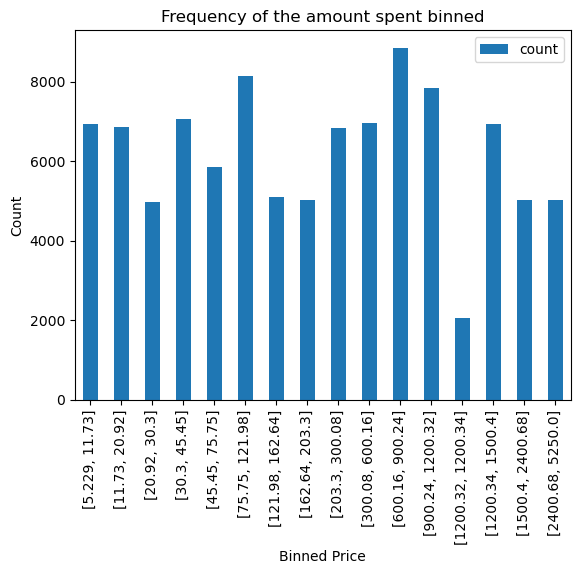

In [41]:
merged_data_binned_price.plot(x='binned_price', y='count', kind='bar')

plt.title('Frequency of the amount spent binned')
plt.xlabel('Binned Price')
plt.ylabel('Count')
plt.show()

## The price is now more evenly distributed, the next steps would be to take the median of each bin and replace the binned values, this is done to improve the machine learning efficency

In [42]:
print(merged_data.info()) # we now have a new column called binned_price

<class 'pandas.core.frame.DataFrame'>
Index: 99437 entries, 0 to 99456
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   customer_id     99437 non-null  object  
 1   gender          99437 non-null  object  
 2   age             99437 non-null  float64 
 3   payment_method  99437 non-null  object  
 4   invoice_no      99437 non-null  object  
 5   category        99437 non-null  object  
 6   quantity        99437 non-null  int64   
 7   price           99437 non-null  float64 
 8   invoice_date    99437 non-null  object  
 9   shopping_mall   99437 non-null  object  
 10  binned_price    99437 non-null  category
dtypes: category(1), float64(2), int64(1), object(7)
memory usage: 8.4+ MB
None


In [43]:
print(merged_data)

      customer_id  gender   age payment_method invoice_no         category  \
0         C241288  Female  28.0    Credit Card    I138884         Clothing   
1         C111565    Male  21.0     Debit Card    I317333            Shoes   
2         C266599    Male  20.0           Cash    I127801         Clothing   
3         C988172  Female  66.0    Credit Card    I173702            Shoes   
4         C189076  Female  53.0           Cash    I337046            Books   
...           ...     ...   ...            ...        ...              ...   
99452     C441542  Female  45.0    Credit Card    I219422         Souvenir   
99453     C569580    Male  27.0           Cash    I325143  Food & Beverage   
99454     C103292    Male  63.0     Debit Card    I824010  Food & Beverage   
99455     C800631    Male  56.0           Cash    I702964       Technology   
99456     C273973  Female  36.0    Credit Card    I232867         Souvenir   

       quantity    price invoice_date     shopping_mall       b

In [44]:
merged_data_binned_price

,binned_price,count
0,"[5.229, 11.73]",6935
1,"[11.73, 20.92]",6861
2,"[20.92, 30.3]",4981
3,"[30.3, 45.45]",7063
4,"[45.45, 75.75]",5860
5,"[75.75, 121.98]",8128
6,"[121.98, 162.64]",5086
7,"[162.64, 203.3]",5026
8,"[203.3, 300.08]",6841
9,"[300.08, 600.16]",6950


In [45]:
merged_data.loc[(merged_data['price'] > 5.229) & (merged_data['price'] <= 11.73), 'price_median'] = 8.4795
merged_data.loc[(merged_data['price'] > 11.73) & (merged_data['price'] <= 20.92), 'price_median'] = 16.325
merged_data.loc[(merged_data['price'] > 20.92) & (merged_data['price'] <= 30.3), 'price_median'] = 25.61
merged_data.loc[(merged_data['price'] > 30.3) & (merged_data['price'] <= 45.45), 'price_median'] = 37.875
merged_data.loc[(merged_data['price'] > 45.45) & (merged_data['price'] <= 75.75), 'price_median'] = 60.6
merged_data.loc[(merged_data['price'] > 75.75) & (merged_data['price'] <= 121.98), 'price_median'] = 98.865
merged_data.loc[(merged_data['price'] > 121.98) & (merged_data['price'] <= 162.64), 'price_median'] = 142.31
merged_data.loc[(merged_data['price'] > 162.64) & (merged_data['price'] <= 203.3), 'price_median'] = 182.97
merged_data.loc[(merged_data['price'] > 203.3) & (merged_data['price'] <= 300.08), 'price_median'] = 251.69
merged_data.loc[(merged_data['price'] > 300.08) & (merged_data['price'] <= 600.16), 'price_median'] = 450.12
merged_data.loc[(merged_data['price'] > 600.16) & (merged_data['price'] <= 900.24), 'price_median'] = 750.2
merged_data.loc[(merged_data['price'] > 900.24) & (merged_data['price'] <= 1200.32), 'price_median'] = 1050.28
merged_data.loc[(merged_data['price'] > 1200.32) & (merged_data['price'] <= 1200.34), 'price_median'] = 1200.33
merged_data.loc[(merged_data['price'] > 1200.34) & (merged_data['price'] <= 1500.4), 'price_median'] = 1350.37
merged_data.loc[(merged_data['price'] > 1200.4) & (merged_data['price'] <= 2400.68), 'price_median'] = 1950.54
merged_data.loc[(merged_data['price'] > 2400.68) & (merged_data['price'] <= 5250), 'price_median'] = 3825.34
print(merged_data)

      customer_id  gender   age payment_method invoice_no         category  \
0         C241288  Female  28.0    Credit Card    I138884         Clothing   
1         C111565    Male  21.0     Debit Card    I317333            Shoes   
2         C266599    Male  20.0           Cash    I127801         Clothing   
3         C988172  Female  66.0    Credit Card    I173702            Shoes   
4         C189076  Female  53.0           Cash    I337046            Books   
...           ...     ...   ...            ...        ...              ...   
99452     C441542  Female  45.0    Credit Card    I219422         Souvenir   
99453     C569580    Male  27.0           Cash    I325143  Food & Beverage   
99454     C103292    Male  63.0     Debit Card    I824010  Food & Beverage   
99455     C800631    Male  56.0           Cash    I702964       Technology   
99456     C273973  Female  36.0    Credit Card    I232867         Souvenir   

       quantity    price invoice_date     shopping_mall       b

# Now we will find and remove highly corelated fields

## first lets remove the binned_price column as it is not needed anymore

In [46]:
columns_to_drop = ['binned_price']
merged_data = merged_data.drop(columns=columns_to_drop)

In [47]:
print(merged_data.info()) # the binned_price column is dropped

<class 'pandas.core.frame.DataFrame'>
Index: 99437 entries, 0 to 99456
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99437 non-null  object 
 1   gender          99437 non-null  object 
 2   age             99437 non-null  float64
 3   payment_method  99437 non-null  object 
 4   invoice_no      99437 non-null  object 
 5   category        99437 non-null  object 
 6   quantity        99437 non-null  int64  
 7   price           99437 non-null  float64
 8   invoice_date    99437 non-null  object 
 9   shopping_mall   99437 non-null  object 
 10  price_median    99437 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 9.1+ MB
None


## now lets include only the numeric columns in a new df called merged_data_numeric

In [48]:
merged_data_numeric = merged_data.select_dtypes(include='number')
print(merged_data_numeric.info())

<class 'pandas.core.frame.DataFrame'>
Index: 99437 entries, 0 to 99456
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           99437 non-null  float64
 1   quantity      99437 non-null  int64  
 2   price         99437 non-null  float64
 3   price_median  99437 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 3.8 MB
None


In [49]:
correlation_matrix = merged_data_numeric.corr()
threshold = 0.8  
highly_correlated_cols = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_cols.add(colname)

print("Highly correlated columns:", highly_correlated_cols)

Highly correlated columns: {'price_median'}


In [50]:
correlation_value = correlation_matrix.loc['price', 'price_median']
print("Correlation value between 'price' and 'median':", correlation_value)


Correlation value between 'price' and 'median': 0.9643736592955177


## since price and price_median have high corelation, i will remove the price column and leave the price_median column as the price_median coumn have a more even data distribution

In [51]:
columns_to_drop = ['price']
merged_data = merged_data.drop(columns=columns_to_drop)

In [52]:
print(merged_data.info()) # the price column is dropped

<class 'pandas.core.frame.DataFrame'>
Index: 99437 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99437 non-null  object 
 1   gender          99437 non-null  object 
 2   age             99437 non-null  float64
 3   payment_method  99437 non-null  object 
 4   invoice_no      99437 non-null  object 
 5   category        99437 non-null  object 
 6   quantity        99437 non-null  int64  
 7   invoice_date    99437 non-null  object 
 8   shopping_mall   99437 non-null  object 
 9   price_median    99437 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 8.3+ MB
None


## Lets also drop the customer_id and Invoice_no columns as they are identifier columns

In [53]:
columns_to_drop = ['customer_id','invoice_no']
merged_data = merged_data.drop(columns=columns_to_drop)

In [54]:
print(merged_data.info()) # the columns are dropped

<class 'pandas.core.frame.DataFrame'>
Index: 99437 entries, 0 to 99456
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          99437 non-null  object 
 1   age             99437 non-null  float64
 2   payment_method  99437 non-null  object 
 3   category        99437 non-null  object 
 4   quantity        99437 non-null  int64  
 5   invoice_date    99437 non-null  object 
 6   shopping_mall   99437 non-null  object 
 7   price_median    99437 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 6.8+ MB
None


## Lets also drop the invoice_date and shopping_mall columns as they are redundant columns providing information on where and when the shoppers bought the items

In [55]:
columns_to_drop = ['shopping_mall','invoice_date']
merged_data = merged_data.drop(columns=columns_to_drop)

In [56]:
print(merged_data.info()) # the columns are dropped

<class 'pandas.core.frame.DataFrame'>
Index: 99437 entries, 0 to 99456
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          99437 non-null  object 
 1   age             99437 non-null  float64
 2   payment_method  99437 non-null  object 
 3   category        99437 non-null  object 
 4   quantity        99437 non-null  int64  
 5   price_median    99437 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.3+ MB
None


## Now lets one hot encode the object data types

In [57]:
merged_data_encoded = pd.get_dummies(merged_data, columns=['gender', 'payment_method'])
print(merged_data_encoded.columns)

Index(['age', 'category', 'quantity', 'price_median', 'gender_Female',
       'gender_Male', 'payment_method_Cash', 'payment_method_Credit Card',
       'payment_method_Debit Card'],
      dtype='object')


In [58]:
columns_to_drop = ['category']
merged_data_encoded = merged_data_encoded.drop(columns=columns_to_drop)

In [59]:
print(merged_data_encoded.columns)

Index(['age', 'quantity', 'price_median', 'gender_Female', 'gender_Male',
       'payment_method_Cash', 'payment_method_Credit Card',
       'payment_method_Debit Card'],
      dtype='object')


In [60]:
print(merged_data_encoded)

        age  quantity  price_median  gender_Female  gender_Male  \
0      28.0         5     1950.5400           True        False   
1      21.0         3     1950.5400          False         True   
2      20.0         1      251.6900          False         True   
3      66.0         5     3825.3400           True        False   
4      53.0         4       60.6000           True        False   
...     ...       ...           ...            ...          ...   
99452  45.0         5       60.6000           True        False   
99453  27.0         2        8.4795          False         True   
99454  63.0         2        8.4795          False         True   
99455  56.0         4     3825.3400          False         True   
99456  36.0         3       37.8750           True        False   

       payment_method_Cash  payment_method_Credit Card  \
0                    False                        True   
1                    False                       False   
2                    

# Now we can start to train our model 

## Lets load the libaries first

In [61]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import ensemble
import sklearn.externals
import joblib
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
import xgboost as xgb

In [62]:
X = merged_data_encoded.values
y = merged_data['category'].values

In [63]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

## Lets first perform normalization on our x_train, x_test

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler_X = MinMaxScaler()

In [66]:
# Fit and transform the X_train data
X_train_scaled = scaler_X.fit_transform(X_train)

In [67]:
# Transform the X_test data
X_test_scaled = scaler_X.transform(X_test)

## Now lets train our models


In [68]:
seed = 3
scoring = 'accuracy'

In [69]:
LR = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)
LDA = LinearDiscriminantAnalysis()
KNN = KNeighborsClassifier()
CART = DecisionTreeClassifier()
NB = GaussianNB()
SVM = SVC(gamma='auto')
LGBM = lgb.LGBMClassifier()


In [70]:
LR.fit(X_train_scaled,y_train)
LDA.fit(X_train_scaled,y_train)
KNN.fit(X_train_scaled,y_train)
CART.fit(X_train_scaled,y_train)
NB.fit(X_train_scaled,y_train)
SVM.fit(X_train_scaled,y_train)
LGBM.fit(X_train_scaled,y_train)


C:\Users\Administrator\anaconda3\envs\MLDV\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 83
[LightGBM] [Info] Number of data points in the train set: 69605, number of used features: 8
[LightGBM] [Info] Start training from score -2.991217
[LightGBM] [Info] Start training from score -1.060957
[LightGBM] [Info] Start training from score -1.878780
[LightGBM] [Info] Start training from score -1.903630
[LightGBM] [Info] Start training from score -2.294216
[LightGBM] [Info] Start training from score -3.010859
[LightGBM] [Info] Start training from score -2.988361
[LightGBM] [Info] Start training from score -2.288816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [71]:
Predict_LR = LR.predict(X_test_scaled)
Predict_LDA = LDA.predict(X_test_scaled)
Predict_KNN = KNN.predict(X_test_scaled)
Predict_CART = CART.predict(X_test_scaled)
Predict_NB = NB.predict(X_test_scaled)
Predict_SVM = SVM.predict(X_test_scaled)
Predict_LGBM = LGBM.predict(X_test_scaled)


In [72]:
accuracy_score_LR = accuracy_score(y_test,Predict_LR)
accuracy_score_LDA = accuracy_score(y_test,Predict_LDA)
accuracy_score_KNN = accuracy_score(y_test,Predict_KNN)
accuracy_score_CART = accuracy_score(y_test,Predict_CART)
accuracy_score_NB = accuracy_score(y_test,Predict_NB)
accuracy_score_SVM = accuracy_score(y_test,Predict_SVM)
accuracy_score_LGBM = accuracy_score(y_test,Predict_LGBM)

print('LR:',accuracy_score_LR)
print('LDA:',accuracy_score_LDA)
print('KNN:',accuracy_score_KNN)
print('CART:',accuracy_score_CART)
print('NB:',accuracy_score_NB)
print('SVM:',accuracy_score_SVM)
print('LGBM:',accuracy_score_LGBM)

LR: 0.7627379994636632
LDA: 0.529230356663985
KNN: 0.8163716814159292
CART: 0.8471440064360418
NB: 0.6575489407347814
SVM: 0.7492625368731564
LGBM: 0.8508313220702601


## Based on accuracy, it seems that our LGBM and CART models are our bext choice, however, we also have to take a look at f1 score, confusion matrix,recall_score and precision score

In [73]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [74]:
conf_matrix_LR = confusion_matrix(y_test,Predict_LR)
conf_matrix_LDA = confusion_matrix(y_test,Predict_LDA)
conf_matrix_KNN = confusion_matrix(y_test,Predict_KNN)
conf_matrix_CART = confusion_matrix(y_test,Predict_CART)
conf_matrix_NB = confusion_matrix(y_test,Predict_NB)
conf_matrix_SVM = confusion_matrix(y_test,Predict_SVM)
conf_matrix_LGBM = confusion_matrix(y_test,Predict_LGBM)

print('LR:\n', conf_matrix_LR)
print('LDA:\n',conf_matrix_LDA)
print('KNN:\n',conf_matrix_KNN)
print('CART:\n',conf_matrix_CART)
print('NB:\n',conf_matrix_NB)
print('SVM:\n',conf_matrix_SVM)
print('LGBM:\n',conf_matrix_LGBM)

LR:
 [[    0     0     0  1483     0     0     0     0]
 [    0 10391     0     0     0     0     0     0]
 [    0     0  3761   699     0     0     0     0]
 [    0     0     0  4401     0     0     0     0]
 [    0     0     0     0  3013     0     0     0]
 [    0     0     0  1567     0     0     0     0]
 [    0     0     0     0   300     0  1188     0]
 [    0     0  2586   443     0     0     0     0]]
LDA:
 [[    0   284   558   641     0     0     0     0]
 [    0 10391     0     0     0     0     0     0]
 [    0  1748   915  1797     0     0     0     0]
 [    0   896  1104  2401     0     0     0     0]
 [    0  1230     0     0  1172     0   611     0]
 [    0   325   551   691     0     0     0     0]
 [    0   292     0     0   287     0   909     0]
 [    0   617  1180  1232     0     0     0     0]]
KNN:
 [[  706     0    11   386     0   380     0     0]
 [    0 10391     0     0     0     0     0     0]
 [   13     0  3332     2     0     4     0  1109]
 [   76     

In [75]:
print(f'LR:\n Total Number of true positive: {26704} \n Total Number of False Positive: {8783}')
print(f'LDA:\n Total Number of true positive: {35184} \n Total Number of False Positive: {6001}')
print(f'KNN:\n Total Number of true positive: {27544} \n Total Number of False Positive: {1085}')
print(f'CART:\n Total Number of true positive: {31633} \n Total Number of False Positive: {2303}')
print(f'NB:\n Total Number of true positive: {27272} \n Total Number of False Positive: {2740}')
print(f'SVM:\n Total Number of true positive: {26747} \n Total Number of False Positive: {6795}')
print(f'LGBM:\n Total Number of true positive: {28087} \n Total Number of False Positive: {2513}')

LR:
 Total Number of true positive: 26704 
 Total Number of False Positive: 8783
LDA:
 Total Number of true positive: 35184 
 Total Number of False Positive: 6001
KNN:
 Total Number of true positive: 27544 
 Total Number of False Positive: 1085
CART:
 Total Number of true positive: 31633 
 Total Number of False Positive: 2303
NB:
 Total Number of true positive: 27272 
 Total Number of False Positive: 2740
SVM:
 Total Number of true positive: 26747 
 Total Number of False Positive: 6795
LGBM:
 Total Number of true positive: 28087 
 Total Number of False Positive: 2513


### using confusion matrix, we can see that the LGBM and CART model is still our top choice

In [76]:
precision_LR = precision_score(y_test,Predict_LR,average='micro')
precision_LDA = precision_score(y_test,Predict_LDA,average='micro')
precision_KNN = precision_score(y_test,Predict_KNN,average='micro')
precision_CART = precision_score(y_test,Predict_CART,average='micro')
precision_NB = precision_score(y_test,Predict_NB,average='micro')
precision_SVM = precision_score(y_test,Predict_SVM,average='micro')
precision_LGBM = precision_score(y_test,Predict_LGBM,average='micro')

print('LR:',precision_LR)
print('LDA:',precision_LDA)
print('KNN:',precision_KNN)
print('CART:',precision_CART)
print('NB:',precision_NB)
print('SVM:',precision_SVM)
print('LGBM:',precision_LGBM)

LR: 0.7627379994636632
LDA: 0.529230356663985
KNN: 0.8163716814159292
CART: 0.8471440064360418
NB: 0.6575489407347814
SVM: 0.7492625368731564
LGBM: 0.8508313220702601


### Based on precision score, CART and LGBM models still out top choice


In [77]:
recall_LR = recall_score(y_test,Predict_LR,average='micro')
recall_LDA = recall_score(y_test,Predict_LDA,average='micro')
recall_KNN = recall_score(y_test,Predict_KNN,average='micro')
recall_CART = recall_score(y_test,Predict_CART,average='micro')
recall_NB = recall_score(y_test,Predict_NB,average='micro')
recall_SVM = recall_score(y_test,Predict_SVM,average='micro')
recall_LGBM = recall_score(y_test,Predict_LGBM,average='micro')

print('LR:',recall_LR)
print('LDA:',recall_LDA)
print('KNN:',recall_KNN)
print('CART:',recall_CART)
print('NB:',recall_NB)
print('SVM:',recall_SVM)
print('LGBM:',recall_LGBM)

LR: 0.7627379994636632
LDA: 0.529230356663985
KNN: 0.8163716814159292
CART: 0.8471440064360418
NB: 0.6575489407347814
SVM: 0.7492625368731564
LGBM: 0.8508313220702601


### Based on Recall score, CART and LGBM are still our top choice

In [78]:
f1_LR = f1_score(y_test,Predict_LR,average='macro')
f1_LDA = f1_score(y_test,Predict_LDA,average='macro')
f1_KNN = f1_score(y_test,Predict_KNN,average='macro')
f1_CART = f1_score(y_test,Predict_CART,average='macro')
f1_NB = f1_score(y_test,Predict_NB,average='macro')
f1_SVM = f1_score(y_test,Predict_SVM,average='macro')
f1_LGBM = f1_score(y_test,Predict_LGBM,average='macro')

print('LR:',f1_LR)
print('LDA:',f1_LDA)
print('KNN:',f1_KNN)
print('CART:',f1_CART)
print('NB:',f1_NB)
print('SVM:',f1_SVM)
print('LGBM:',f1_LGBM)

LR: 0.5267361199393874
LDA: 0.3201771513379656
KNN: 0.7059442079482203
CART: 0.7494559723283957
NB: 0.401145047200807
SVM: 0.5026907716121556
LGBM: 0.7477382010519624


### Based on f1 score, CART and LGBM are still our top choice

In [79]:
print('LR:\n',classification_report(y_test, Predict_LR))
print('LDA:\n',classification_report(y_test, Predict_LDA))
print('KNN:\n',classification_report(y_test, Predict_KNN))
print('CART:\n',classification_report(y_test, Predict_CART))
print('NB:\n',classification_report(y_test, Predict_NB))
print('SVM:\n',classification_report(y_test, Predict_SVM))
print('LGBM:\n',classification_report(y_test, Predict_LGBM))

C:\Users\Administrator\anaconda3\envs\MLDV\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\envs\MLDV\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\envs\MLDV\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR:
                  precision    recall  f1-score   support

          Books       0.00      0.00      0.00      1483
       Clothing       1.00      1.00      1.00     10391
      Cosmetics       0.59      0.84      0.70      4460
Food & Beverage       0.51      1.00      0.68      4401
          Shoes       0.91      1.00      0.95      3013
       Souvenir       0.00      0.00      0.00      1567
     Technology       1.00      0.80      0.89      1488
           Toys       0.00      0.00      0.00      3029

       accuracy                           0.76     29832
      macro avg       0.50      0.58      0.53     29832
   weighted avg       0.65      0.76      0.69     29832



C:\Users\Administrator\anaconda3\envs\MLDV\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\envs\MLDV\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\envs\MLDV\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LDA:
                  precision    recall  f1-score   support

          Books       0.00      0.00      0.00      1483
       Clothing       0.66      1.00      0.79     10391
      Cosmetics       0.21      0.21      0.21      4460
Food & Beverage       0.36      0.55      0.43      4401
          Shoes       0.80      0.39      0.52      3013
       Souvenir       0.00      0.00      0.00      1567
     Technology       0.60      0.61      0.60      1488
           Toys       0.00      0.00      0.00      3029

       accuracy                           0.53     29832
      macro avg       0.33      0.34      0.32     29832
   weighted avg       0.42      0.53      0.45     29832

KNN:
                  precision    recall  f1-score   support

          Books       0.50      0.48      0.49      1483
       Clothing       1.00      1.00      1.00     10391
      Cosmetics       0.65      0.75      0.70      4460
Food & Beverage       0.81      0.95      0.88      4401
          Shoes

C:\Users\Administrator\anaconda3\envs\MLDV\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\envs\MLDV\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\envs\MLDV\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NB:
                  precision    recall  f1-score   support

          Books       0.16      0.17      0.16      1483
       Clothing       0.78      1.00      0.87     10391
      Cosmetics       0.49      0.80      0.61      4460
Food & Beverage       0.78      1.00      0.88      4401
          Shoes       0.00      0.00      0.00      3013
       Souvenir       0.18      0.05      0.08      1567
     Technology       0.60      0.61      0.60      1488
           Toys       0.00      0.00      0.00      3029

       accuracy                           0.66     29832
      macro avg       0.37      0.45      0.40     29832
   weighted avg       0.51      0.66      0.57     29832



C:\Users\Administrator\anaconda3\envs\MLDV\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\envs\MLDV\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\envs\MLDV\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM:
                  precision    recall  f1-score   support

          Books       0.00      0.00      0.00      1483
       Clothing       1.00      1.00      1.00     10391
      Cosmetics       0.49      0.97      0.65      4460
Food & Beverage       0.61      0.84      0.71      4401
          Shoes       0.84      1.00      0.91      3013
       Souvenir       0.00      0.00      0.00      1567
     Technology       1.00      0.60      0.75      1488
           Toys       0.00      0.00      0.00      3029

       accuracy                           0.75     29832
      macro avg       0.49      0.55      0.50     29832
   weighted avg       0.65      0.75      0.68     29832

LGBM:
                  precision    recall  f1-score   support

          Books       0.59      0.63      0.61      1483
       Clothing       1.00      1.00      1.00     10391
      Cosmetics       0.65      0.92      0.76      4460
Food & Beverage       0.93      0.99      0.96      4401
          Shoe

### Based on the clasification report, our best models are CART and LGBM, i will time both of them and select the one that is faster

In [80]:
import time

In [81]:
start_time = time.time()
model = CART
predictions = model.predict(X_test_scaled)
prediction_time = time.time() - start_time
print(f'Prediction Time: {prediction_time:.4f} seconds')

Prediction Time: 0.0056 seconds


In [82]:
start_time = time.time()
model = LGBM
predictions = model.predict(X_test_scaled)
prediction_time = time.time() - start_time
print(f'Prediction Time: {prediction_time:.4f} seconds')

Prediction Time: 0.1961 seconds


### Based on time, we can see that CART is faster therefore, i will select CART as my model

In [83]:
#Saving the CART trained model

import joblib
joblib.dump(CART,"model_CART_classifier.pkl")


['model_CART_classifier.pkl']

## Now we will perform feature selection

In [84]:
model = CART


In [85]:
encoded_columns = np.array(['age', 'quantity', 'price_median', 'gender_Female', 'gender_Male',
       'payment_method_Cash', 'payment_method_Credit Card',
       'payment_method_Debit Card'])

In [86]:
importance = model.feature_importances_

In [87]:
feature_indexes_by_importance = importance.argsort()

In [88]:
# Print each feature label, from least important to most important
for index in feature_indexes_by_importance:
    print("{} - {:.2f}%".format(encoded_columns[index], (importance[index] * 100.0)))

payment_method_Credit Card - 0.17%
payment_method_Debit Card - 0.18%
gender_Female - 0.19%
gender_Male - 0.19%
payment_method_Cash - 0.19%
age - 1.92%
quantity - 17.44%
price_median - 79.72%


### i will remove the gender_male, gender_female and payment_method_Credit Card , payment_method_Debit Card , payment_method_Cash columns since it has a low weightage

In [89]:
columns_to_drop = ['gender_Female', 'gender_Male','payment_method_Cash', 'payment_method_Credit Card','payment_method_Debit Card']
merged_data_encoded = merged_data_encoded.drop(columns=columns_to_drop)

In [90]:
print(merged_data_encoded.columns) #columns are dropped

Index(['age', 'quantity', 'price_median'], dtype='object')


In [91]:
X = merged_data_encoded.values
y = merged_data['category'].values

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [93]:
# Fit and transform the X_train data
X_train_scaled = scaler_X.fit_transform(X_train)

In [94]:
# Transform the X_test data
X_test_scaled = scaler_X.transform(X_test)

## we will now export our scaler to apply it when predicting

In [95]:
joblib.dump(scaler_X, 'MinMax_scaler_model.joblib')


['MinMax_scaler_model.joblib']

In [96]:
CART.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [97]:
print('CART:\n',classification_report(y_test, CART.predict(X_test_scaled)))

CART:
                  precision    recall  f1-score   support

          Books       0.58      0.66      0.62      1483
       Clothing       1.00      1.00      1.00     10391
      Cosmetics       0.65      0.99      0.78      4460
Food & Beverage       0.93      1.00      0.96      4401
          Shoes       0.91      1.00      0.95      3013
       Souvenir       0.51      0.33      0.40      1567
     Technology       1.00      0.80      0.89      1488
           Toys       0.95      0.21      0.34      3029

       accuracy                           0.86     29832
      macro avg       0.82      0.75      0.74     29832
   weighted avg       0.88      0.86      0.83     29832



In [98]:
import joblib
joblib.dump(CART,"model_CART_classifier_with_feature_selection.pkl")


['model_CART_classifier_with_feature_selection.pkl']

### our f1 score and precision have improved

### we will now perform hyperparameter tunning using optuna

In [99]:
import optuna
from time import time
from sklearn.model_selection import cross_val_score

In [100]:
# Record the start time
start=time()

# Create a dictionary to record the speed
speed={}

# Create the model
model = CART

# Define the objective function
"""The objective function is a function that takes a set of hyperparameters as input and 
returns a value that represents the quality of the model. """
def objective(trial):
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])
    max_depth = trial.suggest_int('max_depth', 3, 30)
    splitter = trial.suggest_categorical('splitter', ['random', 'best'])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    model.set_params(criterion=criterion, max_depth=max_depth, splitter=splitter,
                     min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

    # Fit the model on the training data
    model.fit(X_train_scaled, y_train)

    # Evaluate the model using cross-validation
    score = cross_val_score(model, X_train_scaled, y_train, n_jobs=-1, cv=5).mean()

    return score


# Run the optimization

study = optuna.create_study()

"""
The value of n_trials is the number of times that Optuna will try 
to find a better set of hyperparameters. In our code, we have set n_trials to 100. 
This means that Optuna will try 100 different combinations of hyperparameters to 
find the best set of hyperparameters.
The value of n_trials is a trade-off between the amount of time that you want to 
spend optimizing the hyperparameters and the quality of the results. 
If you set n_trials to a high value, Optuna will be able to search a wider range 
of hyperparameters and find a better set of hyperparameters. 
However, it will also take longer to run the optimization.
"""
study.optimize(objective, n_trials=100)

# Print the best parameters
print(study.best_params)

# Record the time needed to run and accuracy in the respective dictionaries
speed['GradientBoosting'] = np.round(time()-start, 3)

# Print the results - mean accuracy, standard deviation and run time
print(f"Run time: {speed['GradientBoosting']}s")


[I 2023-11-28 14:52:59,511] A new study created in memory with name: no-name-efa0275d-47f3-4fea-8bf1-3e665a65fca1
[I 2023-11-28 14:53:02,384] Trial 0 finished with value: 0.8566194957258819 and parameters: {'criterion': 'entropy', 'max_depth': 25, 'splitter': 'best', 'min_samples_split': 4, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.8566194957258819.
[I 2023-11-28 14:53:03,847] Trial 1 finished with value: 0.8585446447812657 and parameters: {'criterion': 'log_loss', 'max_depth': 9, 'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.8566194957258819.
[I 2023-11-28 14:53:05,133] Trial 2 finished with value: 0.8576539041735508 and parameters: {'criterion': 'gini', 'max_depth': 13, 'splitter': 'best', 'min_samples_split': 17, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8566194957258819.
[I 2023-11-28 14:53:05,539] Trial 3 finished with value: 0.8566769628618633 and parameters: {'criterion': 'gini', 'max_depth': 30, 'splitt

[I 2023-11-28 14:53:17,994] Trial 33 finished with value: 0.7039293154227426 and parameters: {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random', 'min_samples_split': 6, 'min_samples_leaf': 7}. Best is trial 21 with value: 0.5124631851160117.
[I 2023-11-28 14:53:18,439] Trial 34 finished with value: 0.8588319804611737 and parameters: {'criterion': 'entropy', 'max_depth': 8, 'splitter': 'best', 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 21 with value: 0.5124631851160117.
[I 2023-11-28 14:53:18,837] Trial 35 finished with value: 0.543868974929962 and parameters: {'criterion': 'gini', 'max_depth': 3, 'splitter': 'random', 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 21 with value: 0.5124631851160117.
[I 2023-11-28 14:53:19,281] Trial 36 finished with value: 0.8585446447812657 and parameters: {'criterion': 'entropy', 'max_depth': 9, 'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 8}. Best is trial 21 with value: 0.51246318511601

[I 2023-11-28 14:53:31,425] Trial 66 finished with value: 0.8000718339199769 and parameters: {'criterion': 'entropy', 'max_depth': 6, 'splitter': 'random', 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 53 with value: 0.4921341857625171.
[I 2023-11-28 14:53:31,806] Trial 67 finished with value: 0.5129660225558509 and parameters: {'criterion': 'gini', 'max_depth': 3, 'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 53 with value: 0.4921341857625171.
[I 2023-11-28 14:53:32,216] Trial 68 finished with value: 0.6652539329071188 and parameters: {'criterion': 'gini', 'max_depth': 4, 'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 53 with value: 0.4921341857625171.
[I 2023-11-28 14:53:32,670] Trial 69 finished with value: 0.8484304288485023 and parameters: {'criterion': 'gini', 'max_depth': 5, 'splitter': 'best', 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 53 with value: 0.4921341857625171

[I 2023-11-28 14:53:44,722] Trial 99 finished with value: 0.7501903598879391 and parameters: {'criterion': 'gini', 'max_depth': 5, 'splitter': 'random', 'min_samples_split': 14, 'min_samples_leaf': 6}. Best is trial 91 with value: 0.47067021047338553.


{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'random', 'min_samples_split': 5, 'min_samples_leaf': 1}
Run time: 45.215s


In [101]:
best_params = study.best_params

In [102]:
model.set_params(**best_params)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5,
                       splitter='random')

In [103]:
model.fit(X_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5,
                       splitter='random')

In [104]:
print('CART:\n',classification_report(y_train, model.predict(X_train_scaled)))

C:\Users\Administrator\anaconda3\envs\MLDV\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\envs\MLDV\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CART:
                  precision    recall  f1-score   support

          Books       0.00      0.00      0.00      3496
       Clothing       0.70      0.60      0.65     24092
      Cosmetics       0.24      1.00      0.39     10634
Food & Beverage       0.00      0.00      0.00     10373
          Shoes       0.67      0.20      0.31      7019
       Souvenir       0.00      0.00      0.00      3428
     Technology       1.00      0.60      0.75      3506
           Toys       0.00      0.00      0.00      7057

       accuracy                           0.41     69605
      macro avg       0.33      0.30      0.26     69605
   weighted avg       0.40      0.41      0.35     69605



C:\Users\Administrator\anaconda3\envs\MLDV\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
print('CART:\n',classification_report(y_test, model.predict(X_test_scaled)))

C:\Users\Administrator\anaconda3\envs\MLDV\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CART:
                  precision    recall  f1-score   support

          Books       0.00      0.00      0.00      1483
       Clothing       0.70      0.59      0.64     10391
      Cosmetics       0.23      1.00      0.38      4460
Food & Beverage       0.00      0.00      0.00      4401
          Shoes       0.67      0.20      0.31      3013
       Souvenir       0.00      0.00      0.00      1567
     Technology       1.00      0.61      0.75      1488
           Toys       0.00      0.00      0.00      3029

       accuracy                           0.41     29832
      macro avg       0.32      0.30      0.26     29832
   weighted avg       0.40      0.41      0.35     29832



C:\Users\Administrator\anaconda3\envs\MLDV\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\envs\MLDV\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
import joblib
joblib.dump(CART,"model_CART_classifier_hyperParameterTuning.pkl")


['model_CART_classifier_hyperParameterTuning.pkl']

## After performing hyper parameter tuning, our model turned out worse so we will use the model before performing hyperparameter tuning

# The End